In [4]:
import pandas as pd
import numpy as np


In [5]:
data1=pd.read_excel("/content/iris.xls")
data1

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data1.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

handing missing values

In [7]:
data1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [8]:
num_cols=data1[["SL","SW",'PL']]

In [9]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer =SimpleImputer(missing_values =np.nan,strategy ='mean')

In [12]:
imputer = imputer.fit(num_cols)

In [13]:
num_cols = imputer.transform(num_cols)

In [14]:
type(num_cols)

numpy.ndarray

In [15]:
num_cols = pd.DataFrame(num_cols,columns=["SL","SW","PL"])

In [16]:
type(num_cols)

pandas.core.frame.DataFrame

In [17]:
num_cols.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [18]:
data1=data1.drop(["SL","SW","PL"],axis=1)

In [19]:
data1.head()

,PW,Classification
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa


In [20]:
data1=pd.concat([num_cols,data1],axis=1)

In [21]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [22]:
data1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'pl')

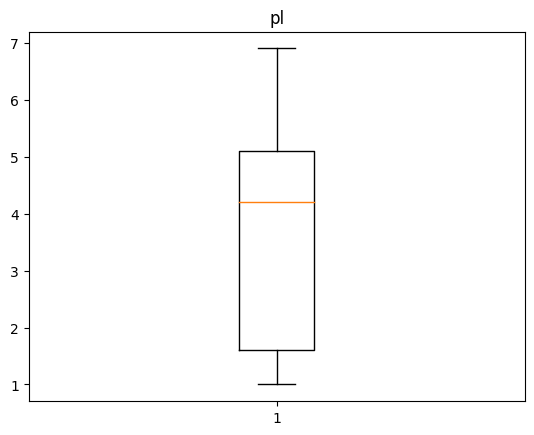

In [24]:
plt.boxplot(data1['PL'])
plt.title('pl')

Text(0.5, 1.0, 'SW')

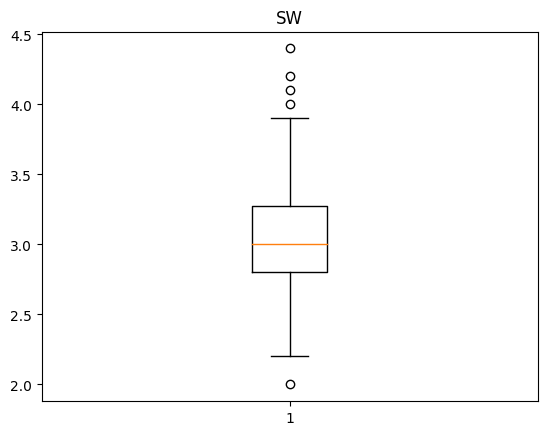

In [25]:
plt.boxplot(data1['SW'])
plt.title('SW')

In [26]:
Q1 =np.percentile(data1['SW'],25)
Q1

2.8

In [27]:
Q2 =np.percentile(data1['SW'],50)
Q2

3.0

In [28]:
Q3 =np.percentile(data1['SW'],75)
Q3

3.275

In [29]:
IQR =Q3-Q1

In [30]:
IQR

0.4750000000000001

In [31]:
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [32]:
low_limit

2.0874999999999995

In [33]:
upr_limit

3.9875

In [34]:
outlier =[]
for x in data1['SW']:
    if x>upr_limit or x<low_limit:
      outlier.append(x)

In [35]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [36]:
ind =data1['SW']>upr_limit
data1.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [37]:
data1.drop([14, 15, 32, 33],inplace = True)

In [38]:
data1.shape

(146, 5)

Text(0.5, 1.0, 'SL')

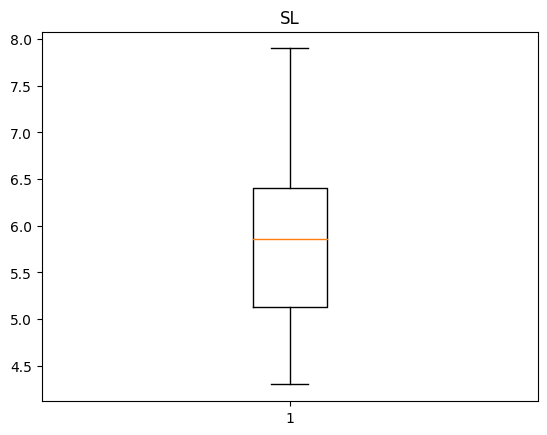

In [39]:
plt.boxplot(data1['SL'])
plt.title('SL')

label encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() ## encoding string to numerical pattern
data1['Classification'] =le.fit_transform(data1['Classification'])
data1

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [41]:
x1=data1.drop('Classification',axis =1)

In [42]:
x1

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
min_max=MinMaxScaler(feature_range=(0,1))
x1=min_max.fit_transform(x1)

In [45]:
type(x1)

numpy.ndarray

In [46]:
x1=pd.DataFrame(x1)

In [47]:
type(x1)

pandas.core.frame.DataFrame

In [48]:
x1.describe()

,0,1,2,3
count,146.000000,146.000000,146.000000,146.000000
mean,0.434535,0.536034,0.478103,0.468893
std,0.226958,0.201365,0.288715,0.314931
min,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.421053,0.101695,0.083333
50%,0.432207,0.526316,0.559322,0.500000
75%,0.583333,0.631579,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [49]:
corr_matrix =data1.corr()

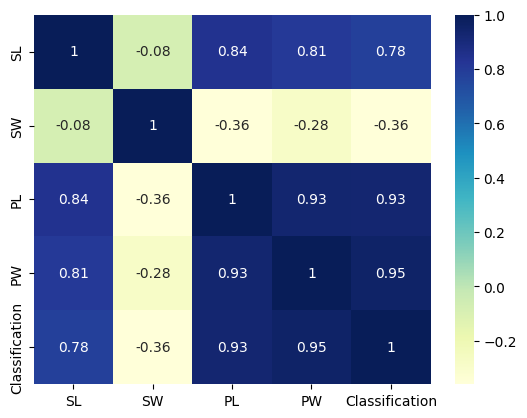

In [50]:
sns.heatmap(corr_matrix,annot =True,cmap = 'YlGnBu')
plt.show()

logistic Regression

In [51]:
x=data1.drop(["Classification"],axis=1)

In [52]:
y=data1["Classification"]

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000)
model =lr.fit(x_train,y_train)

In [55]:
y_predictions=model.predict(x_test)
y_predictions

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [57]:
confusion_matrix(y_test,y_predictions)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [59]:
print("Accuracy=",accuracy_score(y_test,y_predictions))
print("Precision=",precision_score(y_test,y_predictions,average=None))
print("Recall=",recall_score(y_test,y_predictions,average=None))
print("F1 Score=",f1_score(y_test,y_predictions,average=None))

Accuracy= 0.9333333333333333
Precision= [1.    0.875 0.9  ]
Recall= [1.    0.875 0.9  ]
F1 Score= [1.    0.875 0.9  ]


Kneighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
metric_k=[]
neighbors =np.arange(3,15)

In [62]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [63]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

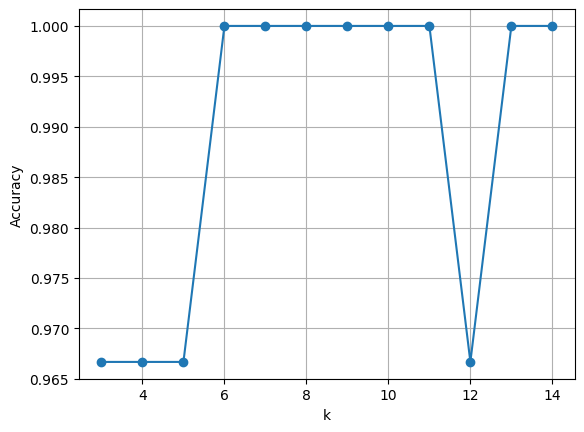

In [64]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid()

In [65]:
classifier =KNeighborsClassifier(n_neighbors=5,metric="euclidean")
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [66]:
print("Accuracy=",accuracy_score(y_test,y_predictions))
print("Precision=",precision_score(y_test,y_predictions,average=None))
print("Recall=",recall_score(y_test,y_predictions,average=None))
print("F1 Score=",f1_score(y_test,y_predictions,average=None))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.9666666666666667
Precision= [1.         1.         0.90909091]
Recall= [1.    0.875 1.   ]
F1 Score= [1.         0.93333333 0.95238095]


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

In [67]:
from sklearn.svm import SVC
svmclf = SVC(kernel= 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [68]:
y_pred=svmclf.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9333333333333333


In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred=dt_clf.predict(x_test)

In [73]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9333333333333333
